In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import joblib


In [2]:
df = pd.read_csv('logement-encadrement-des-loyers.csv', sep=';')

In [3]:
profile = ProfileReport(df, title="Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df['epoque'].unique()

array(['1971-1990', '1946-1970', 'Apres 1990', 'Avant 1946'], dtype=object)

In [5]:
df.describe()

annee       id_zone   id_quartier         piece           ref  \
count  10240.000000  10240.000000  10240.000000  10240.000000  10240.000000   
mean    2020.500000      6.662500     40.500000      2.500000     25.829805   
std        1.118089      4.224966     23.093334      1.118089      4.202257   
min     2019.000000      1.000000      1.000000      1.000000     14.300000   
25%     2019.750000      3.000000     20.750000      1.750000     23.000000   
50%     2020.500000      5.000000     40.500000      2.500000     25.500000   
75%     2021.250000     11.000000     60.250000      3.250000     28.500000   
max     2022.000000     14.000000     80.000000      4.000000     39.600000   

                max           min  code_grand_quartier  
count  10240.000000  10240.000000         1.024000e+04  
mean      30.996164     18.082487         7.511090e+06  
std        5.042818      2.941352         5.997236e+02  
min       17.160000     10.010000         7.510101e+06  
25%       27.600000     16.100000         7.510596e+06  
50%       30.600000     17.850000         7.511090e+06  
75%       34.200000     19.950000         7.511585e+06  
max       47.520000     27.720000         7.512080e+06

In [6]:
df.head(5)

annee  id_zone  id_quartier     nom_quartier  piece      epoque  \
0   2021       11           71      Goutte-d'Or      1   1971-1990   
1   2021       10           55  Petit-Montrouge      4   1946-1970   
2   2021       10           67      Batignolles      4  Apres 1990   
3   2021       14           76           Combat      1   1971-1990   
4   2021       11           43         Roquette      2   1971-1990   

   meuble_txt   ref    max    min  ville  code_grand_quartier  \
0  non meublé  26.0  31.20  18.20  PARIS              7511871   
1      meublé  22.7  27.24  15.89  PARIS              7511455   
2      meublé  26.6  31.92  18.62  PARIS              7511767   
3      meublé  26.3  31.56  18.41  PARIS              7511976   
4  non meublé  23.3  27.96  16.31  PARIS              7511143   

                                           geo_shape  \
0  {"coordinates": [[[2.349667597643656, 48.88373...   
1  {"coordinates": [[[2.329136731859957, 48.83412...   
2  {"coordinates": [[[2.317210277038245, 48.89025...   
3  {"coordinates": [[[2.388343313526396, 48.88056...   
4  {"coordinates": [[[2.379720818886926, 48.85344...   

                            geo_point_2d  
0   48.89213818760239,2.3555361632962777  
1  48.826652625543865,2.3264369992248985  
2    48.88848151392056,2.313856169006362  
3  48.878639075724855,2.3801272818292953  
4   48.857064040831055,2.380364061726766

In [7]:
na_count = df.isna().sum()

na_count

annee                  0
id_zone                0
id_quartier            0
nom_quartier           0
piece                  0
epoque                 0
meuble_txt             0
ref                    0
max                    0
min                    0
ville                  0
code_grand_quartier    0
geo_shape              0
geo_point_2d           0
dtype: int64

In [8]:
df.dtypes

annee                    int64
id_zone                  int64
id_quartier              int64
nom_quartier            object
piece                    int64
epoque                  object
meuble_txt              object
ref                    float64
max                    float64
min                    float64
ville                   object
code_grand_quartier      int64
geo_shape               object
geo_point_2d            object
dtype: object

In [9]:
# the column containing only 2 values is transformed into boolean and renamed
df['meublé'] = df['meuble_txt'].map({'non meublé': False, 'meublé': True})
df.drop('meuble_txt', axis=1, inplace=True)

In [10]:
X = df[['nom_quartier', 'piece', 'epoque', 'meublé']]
y = df['ref']

In [11]:
X

nom_quartier  piece      epoque  meublé
0              Goutte-d'Or      1   1971-1990   False
1          Petit-Montrouge      4   1946-1970    True
2              Batignolles      4  Apres 1990    True
3                   Combat      1   1971-1990    True
4                 Roquette      2   1971-1990   False
...                    ...    ...         ...     ...
10235    Porte-Saint-Denis      4  Apres 1990    True
10236    Porte-Saint-Denis      3   1946-1970   False
10237         Clignancourt      4   1946-1970    True
10238         Montparnasse      1  Avant 1946    True
10239  Hôpital-Saint-Louis      2   1971-1990    True

[10240 rows x 4 columns]

In [12]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X)

X = encoder.transform(X)

In [13]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# a list of tuples, where each tuple contains the model name, the model instance, and a dictionary of hyperparameters to be searched
models = [
    # linear Regression model with no hyperparameters
    ('Linear Regression', LinearRegression(), {}),
    
    # decision Tree model with a hyperparameter 'max_depth' to be searched in the range of 1 to 10
    ('Decision Tree', DecisionTreeRegressor(random_state=42), {'Decision Tree__max_depth': range(1, 11)}),
    
    # random Forest model with two hyperparameters: 'max_depth' (range 1 to 10) and 'n_estimators' (range 10 to 101 with step 10)
    ('Random Forest', RandomForestRegressor(random_state=42), {'Random Forest__max_depth': range(1, 11), 'Random Forest__n_estimators': range(10, 101, 10)}),
    
    # support Vector Regression (SVR) model with three hyperparameters: 'kernel', 'C', and 'epsilon'
    ('SVR', SVR(), {'SVR__kernel': ['linear', 'rbf'], 'SVR__C': [0.1, 1, 10], 'SVR__epsilon': [0.1, 0.2, 0.3]}),
    
    # gradient Boosting model with three hyperparameters: 'learning_rate', 'n_estimators', and 'max_depth'
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), {'Gradient Boosting__learning_rate': [0.01, 0.1, 0.2], 'Gradient Boosting__n_estimators': range(100, 401, 100), 'Gradient Boosting__max_depth': range(1, 6)})
]

# variables to store the best model's performance, name, and hyperparameters
best_score = -np.inf
best_model = None
best_model_name = ''
best_params = None


Linear Regression Metrics:
R-squared Score: 0.8954
Mean Absolute Error: 1.1273
Mean Squared Error: 1.9023




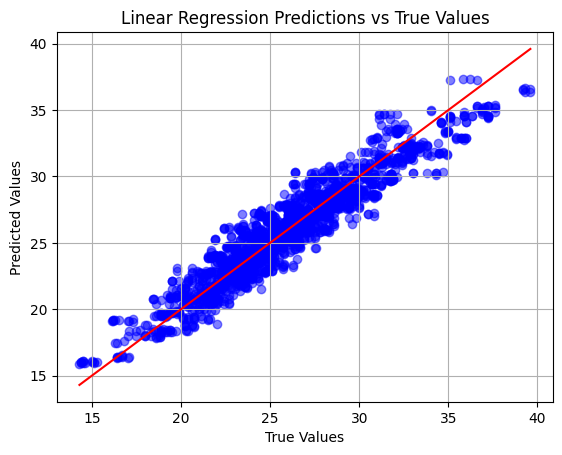

Decision Tree Metrics:
R-squared Score: 0.6441
Mean Absolute Error: 2.0240
Mean Squared Error: 6.4714




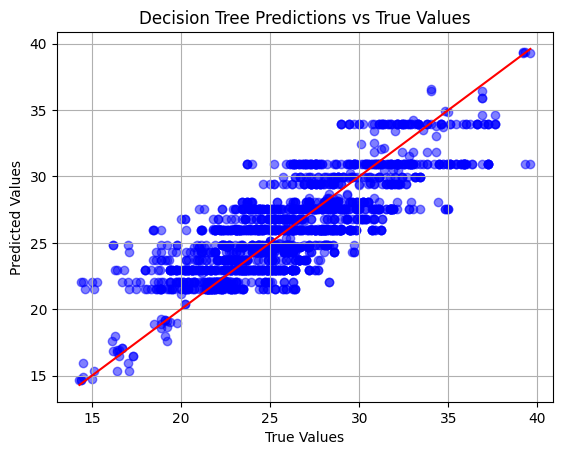

Random Forest Metrics:
R-squared Score: 0.6831
Mean Absolute Error: 1.9866
Mean Squared Error: 5.7633




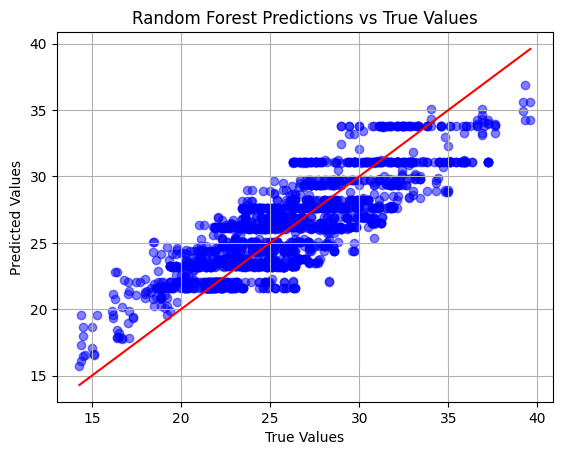

SVR Metrics:
R-squared Score: 0.9772
Mean Absolute Error: 0.5049
Mean Squared Error: 0.4139




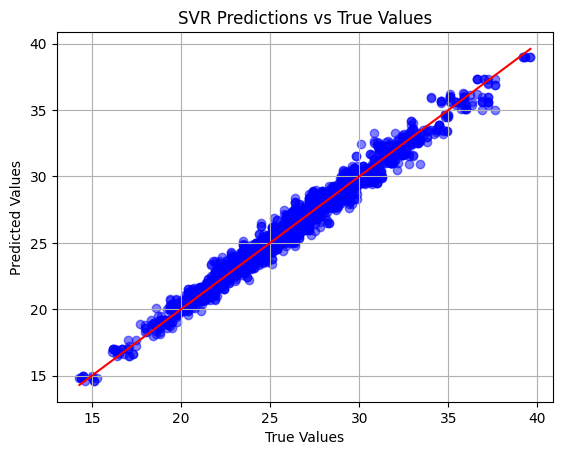

Gradient Boosting Metrics:
R-squared Score: 0.9762
Mean Absolute Error: 0.5185
Mean Squared Error: 0.4325




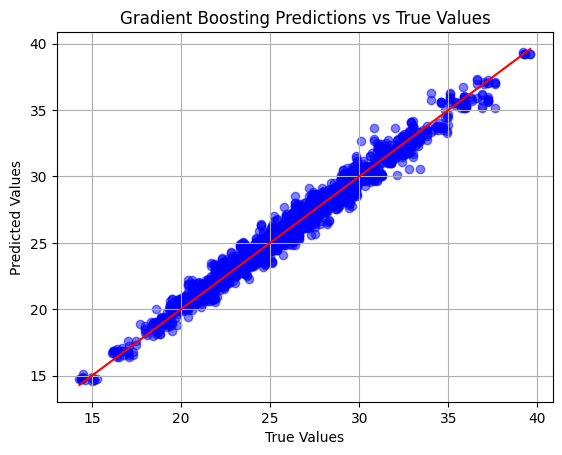

In [16]:
# loop through each model and perform cross-validation with grid search
for name, model, param_grid in models:

    pipe = Pipeline([(name, model)])
    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    # calculation of metrixes
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"R-squared Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print("\n")

    # create a scatter plot of the true vs the predicted values
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} Predictions vs True Values")
    plt.grid(True)
    plt.show()
    
    # save the best model and its performance
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = model
        best_model_name = name
        best_params = grid_search.best_params_


In [17]:
# calculate the predictions for the best model
best_pipe = Pipeline([(best_model_name, best_model)])
best_pipe.set_params(**best_params)
best_pipe.fit(X_train, y_train)
best_y_pred = best_pipe.predict(X_test)

In [18]:
# We save the model and the same encoder to reuse the model on new data 

joblib.dump(best_pipe, f"./model/{best_model_name}_best_model.pkl")

joblib.dump(encoder, './model/encoder.pkl')

['./model/encoder.pkl']

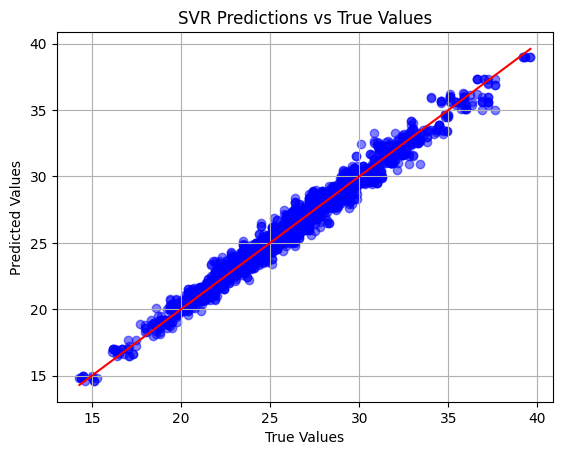

In [19]:
# create a scatter plot of the true vs the predicted values
plt.scatter(y_test, best_y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"{best_model_name} Predictions vs True Values")
plt.grid(True)
plt.show()

In [33]:
# create a new df with new data
new_data = pd.DataFrame({
    'nom_quartier': ["Goutte-d'Or"],
    'piece': [3],
    'epoque': ['1971-1990'],
    'meublé': [True]
})

# transform the categorical features using the trained encoder
new_data_encoded = encoder.transform(new_data[['nom_quartier', 'piece', 'epoque', 'meublé']])

# make predictions on the new data
prediction = best_pipe.predict(new_data_encoded)

print("Prediction for the new data:", prediction)

Prediction for the new data: [22.38144362]
